In [38]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [26]:
myopia_df = pd.read_csv("Resources/myopia.csv")

myopia_df2 = myopia_df.drop("MYOPIC", axis=1)

labels = myopia_df["MYOPIC"]

myopia_df2


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [27]:
# Standarize data with StandarScaler
myopia_scaled = StandardScaler().fit_transform(myopia_df2)
print(myopia_scaled[0:5])


[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]]


In [28]:
# Applying PCA to reduce dimensions 

# Initialize PCA model
pca = PCA(n_components=0.90)

# Get two principal components for the iris data.
myopia_pca = pca.fit_transform(myopia_scaled)
myopia_pca[0]

array([ 0.53550271,  1.14500427, -1.38501894,  0.11600593, -3.22669052,
       -1.92845879, -1.95889156, -1.92299652,  0.02675285,  0.17814386])

PCA Features:

The number of features decreased from 14 to 10

In [29]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data=myopia_pca, columns=["pc1", "pc2","pc3" ,"pc4","pc5","pc6","pc7","pc8","pc9","pc10"]
)
df_myopia_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [30]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

T-SNE MODEL

In [31]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)
tsne

TSNE(learning_rate=35)

In [32]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df_myopia_pca)

/Users/TV/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [33]:
# The dataset has 2 columns
tsne_features.shape

(618, 2)

In [34]:
# Prepare to plot the dataset

# The first column of transformed features
df_myopia_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_myopia_pca['y'] = tsne_features[:,1]

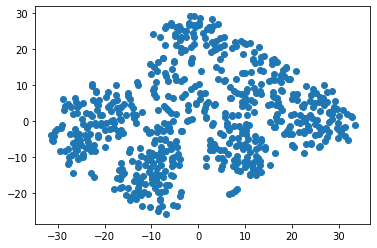

In [35]:
# Visualize the clusters
plt.scatter(df_myopia_pca['x'], df_myopia_pca['y'])
plt.show()

In [36]:
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

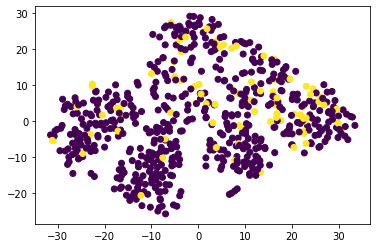

In [37]:
# Visualize the clusters with color
plt.scatter(df_myopia_pca['x'], df_myopia_pca['y'], c=labels)
plt.show()

t-SNE ANALYSIS:

There appears to be two clusters.

K-Means Cluster analysis

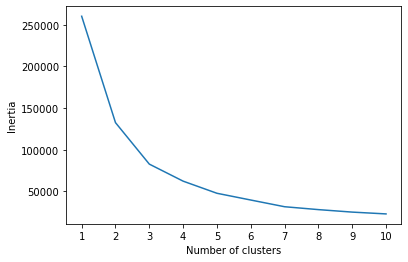

In [39]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

ANALYSIS:

According to the above graph, patients can be clustered into 3 clusters. 